In [7]:
import cv2
from empatches import EMPatches
import imgviz # just for plotting
import matplotlib.pyplot as plt
import numpy as np

In [9]:

# get image either RGB or Grayscale
# img = cv2.imread('/home/fteam6/m15kh/U_NET/U_Net_v2/data/data_test/mask_data/30331320240684_porg_0.png')
img = cv2.imread('/home/ubuntu/m15kh/U_NET/U_Net_v2/dataset/masks/30331320240684_porg_1.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(2600, 2400, 3)

6
shape is (1360, 1360, 3)


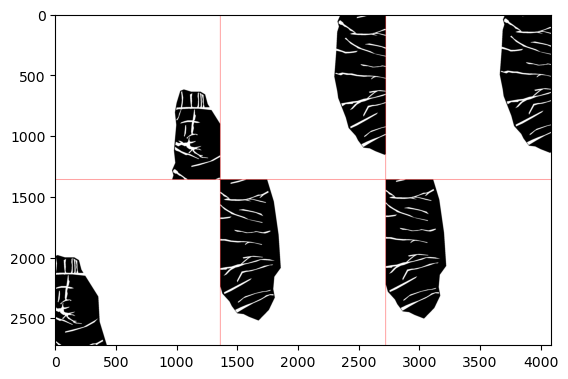

In [14]:
emp = EMPatches()
img_patches, indices = emp.extract_patches(img, patchsize=1360, overlap=0.1)
print(len(img_patches))
print('shape is', img_patches[0].shape)
# displaying 1st 10 image patches
tiled= imgviz.tile(list(map(np.uint8, img_patches)),border=(255,0,0))
plt.figure()
plt.imshow(tiled)

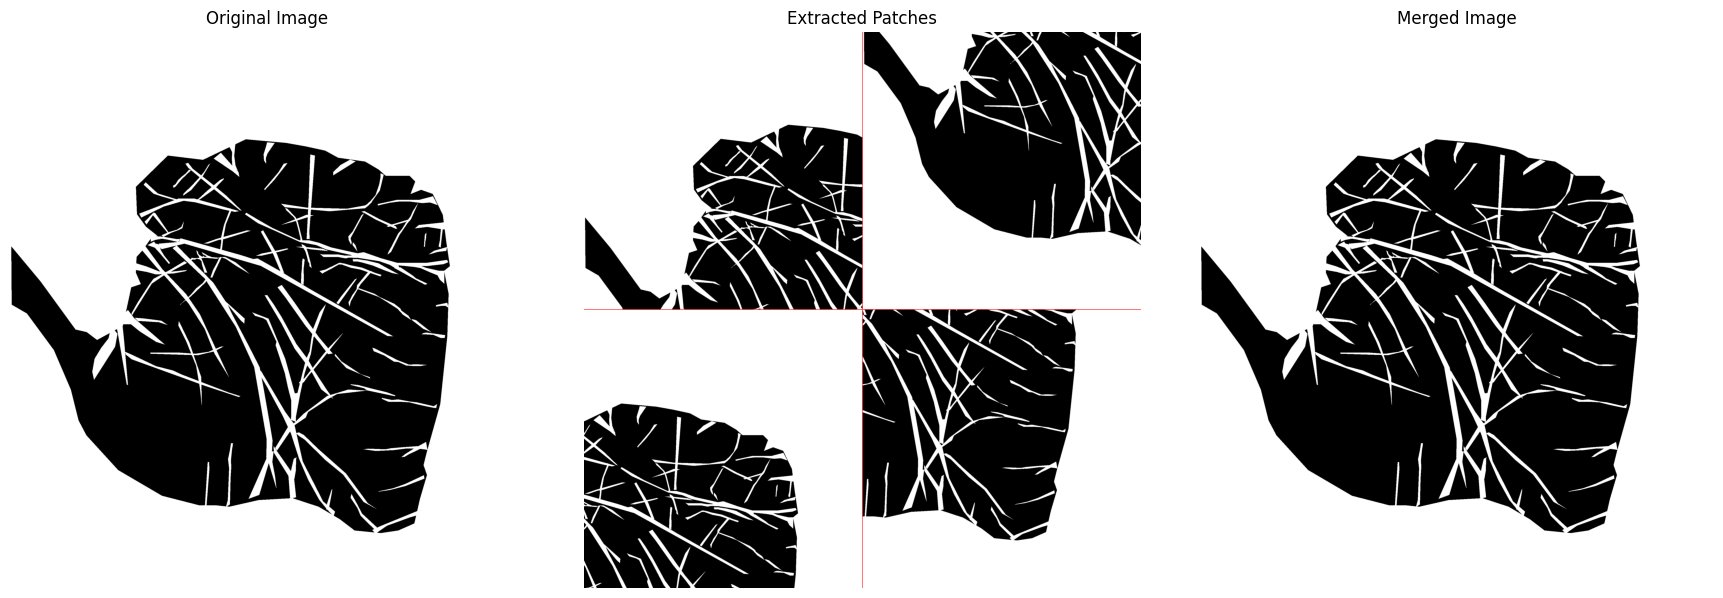

In [6]:
from empatches import EMPatches
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imgviz  # Add this for easy patch tiling (if not installed: pip install imgviz)

# Step 1: Load your image
img = cv2.imread('/home/fteam6/m15kh/U_NET/U_Net_v2/data/data_test/mask_data/30331320240684_porg_0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2: Initialize EMPatches
emp = EMPatches()

# Step 3: Extract patches
patches, indices = emp.extract_patches(img, patchsize=1500, overlap=0.1)

# Step 4: (Optional) Process patches
processed_patches = patches.copy()

# Step 5: Merge patches back
merged_image = emp.merge_patches(processed_patches, indices, mode='avg')

# Step 6: Display original image, patches, and merged image
plt.figure(figsize=(18,6))

# (a) Original image
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

# (b) Patches
# Tile patches into one big image
patches_tiled = imgviz.tile(list(map(np.uint8, patches)), border=(255, 0, 0))
plt.subplot(1,3,2)
plt.title("Extracted Patches")
plt.imshow(patches_tiled)
plt.axis('off')

# (c) Merged image
plt.subplot(1,3,3)
plt.title("Merged Image")
plt.imshow(merged_image.astype(np.uint8))
plt.axis('off')

plt.tight_layout()
plt.show()
